### Take grayscale image of size 512x512, add some salt & pepper noise and perform the following  operations – 
### (c) Apply harmonic and geometric mean filter on the noisy image and compare their performance with PSNR

In [70]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

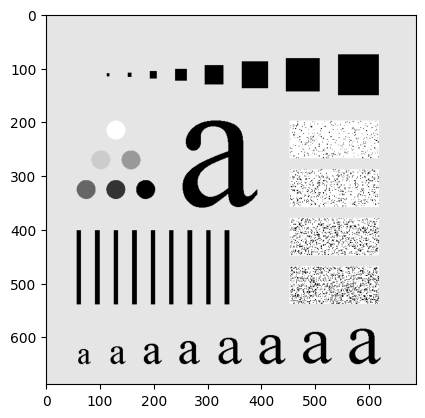

In [71]:
image = cv2.imread('./../../Images/Characters Test Pattern 688x688.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

In [72]:
def add_salt_pepper_noise(image, percent_salt, percent_pepper):
    noisy_image = image.copy()
    salt_amount = (image.shape[0] * image.shape[1]) * (percent_salt / 100)
    pepper_amount = (image.shape[0] * image.shape[1]) * (percent_pepper / 100)

    for k in range(int(salt_amount)):
        index = []
        for x in range(2):
            index.append(np.random.randint(0, image.shape[x]))
        noisy_image[index[0], index[1]] = 255

    for k in range(int(pepper_amount)):
        index = []
        for x in range(2):
            index.append(np.random.randint(0, image.shape[x]))
        noisy_image[index[0], index[1]] = 0

    return noisy_image

In [73]:
def harmonic_mean(image_subsec):
    n = image_subsec.shape[0] * image_subsec.shape[1]
    image_subsec = image_subsec.astype(np.float64)
    x = 1 / (image_subsec + 1e-6)  # avoid division by zero
    x = np.sum(x)
    res = n / x
    return np.uint8(res)


In [74]:
def geometric_mean(image_subsec):
    n = image_subsec.shape[0] * image_subsec.shape[1]
    image_subsec = image_subsec.astype(np.float64)
    x = np.prod(image_subsec)
    x = np.pow(x, 1/n)
    return x.astype(np.uint8)

In [75]:
def filter(image, kernel_size, type = 'harmonic'):
    if type == 'harmonic':
        fn = harmonic_mean
    elif type == 'geometric':
        fn = geometric_mean

    kernel = np.ones(kernel_size)
    padx = kernel_size[0] // 2
    pady = kernel_size[1] // 2

    padded_image = np.zeros((image.shape[0]+2*padx, image.shape[1]+2*pady))
    padded_image[padx : image.shape[0]+padx, pady : image.shape[1]+pady] = image

    new_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            subsec = padded_image[i:i+kernel_size[0], j:j+kernel_size[1]]
            new_image[i,j] = fn(subsec*kernel)
    return new_image.astype(np.uint8)

In [76]:
def psnr(image, noisy_image):
    image = image.astype(np.float32)
    noisy_image = noisy_image.astype(np.float32)
    return 10 * np.log10(255**2/np.mean(np.pow(image-noisy_image, 2)))

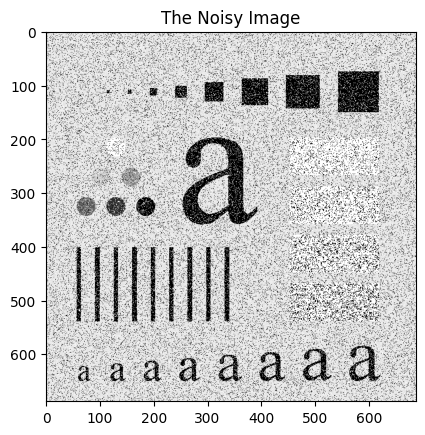

In [77]:
noisy_image = add_salt_pepper_noise(image, 15, 10)
plt.imshow(noisy_image, cmap='gray')
plt.title("The Noisy Image")
plt.show()

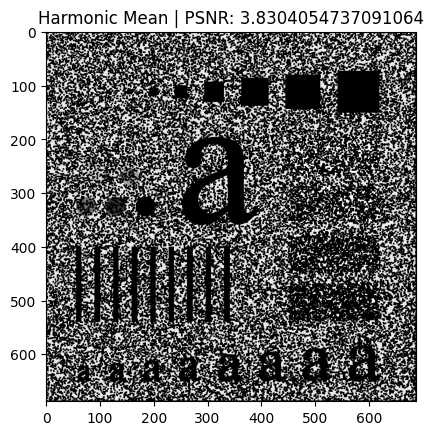

In [78]:
harmonic_mean_image = filter(noisy_image, (3,3), 'harmonic')
psnr_val = psnr(noisy_image, harmonic_mean_image)
plt.imshow(harmonic_mean_image, cmap='gray')
plt.title(f"Harmonic Mean | PSNR: {psnr_val}")
plt.show()

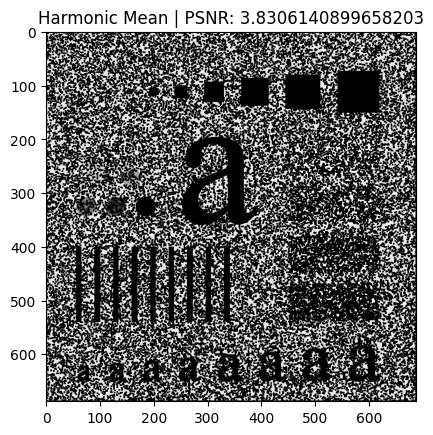

In [79]:
geometric_mean_image = filter(noisy_image, (3,3), 'geometric')
psnr_val = psnr(noisy_image, geometric_mean_image)
plt.imshow(geometric_mean_image, cmap='gray')
plt.title(f"Harmonic Mean | PSNR: {psnr_val}")
plt.show()